In [1]:
# Импортируем все необходимые библиотеки и считаем файлы.

import pandas as pd
import matplotlib.pyplot as plt
import warnings  
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors


import numpy as np
%matplotlib inline
import matplotlib
from datetime import date,timedelta 
from datetime import datetime

In [32]:
customers = pd.read_csv("/home/jupyter-e-sulimenko-18/olist_customers_dataset.csv")

In [33]:
order_items = pd.read_csv("/home/jupyter-e-sulimenko-18/olist_order_items_dataset.csv")

In [4]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [34]:
orders = pd.read_csv("/home/jupyter-e-sulimenko-18/olist_orders_dataset.csv", parse_dates=['order_purchase_timestamp']) #Сразу преобразовываем дату в datetime64

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders.info() # посмотрим на тип данных и пропущенные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [ ]:
#1. Сколько у нас пользователей, которые совершили покупку только один раз?

# Может быть разная трактовка какая покупка считается совершенной (можем считать когда ее оплатили и не отменили,
# а может когда товар доставлен, может когда подтвержден и др варианты).
# Я остановилась на том, что покупка считается сделанной, если ее просто не отменили,
# она может быть в это время находиться на разных этапах, так сказать, своего пути к покупателю.

In [35]:
customers_orders=customers.merge(orders, how='left', on=['customer_id']) #соединили 2 датафрейма (пользователей и заказы) по customer_id

In [8]:
orders_one=customers_orders.query("order_status!='canceled'")  #Отсортировали только сделанные покупки            

In [ ]:
orders_one.head()

In [9]:
# Отсортировали уникальных пользователей, посчитали сколько у них покупок и отсортировали по нашему условию
orders_one.groupby(['customer_unique_id'], as_index=False) \
                    .agg({'order_id':'count'}) \
                    .query("order_id == 1") \
                    .value_counts().sum()

92636

In [ ]:
# Ответ: 92636 пользователей, которые совершили покупку только один раз.
# Получается, что очень маленький процент пользователей, которые совершили покупку более 1 раза 

In [ ]:
#2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [36]:
customers_orders['order_purchase_month']=customers_orders.order_purchase_timestamp.dt.to_period('M') #создали колонку с годом и месяцем 

In [11]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07


In [12]:
# Здесь по условию задачи преминили сортировку, когда товар недоставлен,а находится на разных этапах.
# Сгруппировали по месяцам и статусам, и посчитали количество заказов, чтобы была детализация применили метод pivot
# и далее посчитали среднее

orders_month_mean=(customers_orders.query("order_status !='delivered'") 
                        .groupby(['order_purchase_month','order_status'], as_index=False) 
                        .agg({'order_id': 'count'}) 
                        .pivot(index='order_purchase_month', columns='order_status', values='order_id') 
                        .fillna(0)
                        .mean())

In [20]:
orders_month_mean

order_status
approved        0.083333
canceled       26.041667
created         0.208333
invoiced       13.083333
processing     12.541667
shipped        46.125000
unavailable    25.375000
dtype: float64

In [ ]:
# Видим, что большая часть заказов в основном находится в статусе "отгружен со склада",
# но на втором месте все таки идет отмена заказов и недоступность

In [ ]:
#3. По каждому товару определить, в какой день недели товар чаще всего покупается.

# Здесь будем брать именно тот день недели, когда покупатель создал заказ.
# То, что он мог впоследствии его отменить на данный момент нас не интересует.

In [37]:
customers_orders['order_purchase_day']=customers_orders.order_purchase_timestamp.dt.strftime('%A') # Создали колонку с именем дня недели

In [38]:
customers_orders_items=customers_orders.merge(order_items, how='left', on=['order_id']) #соединили 2 датафрейма по order_id

In [39]:
# Группируем уже по ид товара и дню, и подсчитываем количество товара в каждом дне
orders_month_day=customers_orders_items.groupby(['product_id','order_purchase_day']) \
                        .agg({'order_id': 'count'}).reset_index() \
                        .rename(columns={'order_id':'count'}) 

In [40]:
max_day=orders_month_day.groupby('product_id')[['order_purchase_day','count']].max().reset_index() #ищем день с максимальными покупками

In [54]:
# Так как таких дней может быть несколько, а выбрали мы только самый первый, то пробежимся с помощью цикла по нашим данным, чтобы найти такие же дни
max_day_in_week = pd.DataFrame()
for index, row in max_day.iterrows():
    c = orders_month_day[(orders_month_day['product_id']==row['product_id'])&(orders_month_day['count']==row['count'])]
    max_day_in_week = pd.concat([max_day_in_week,c])

In [55]:
max_day_in_week.head()

,product_id,order_purchase_day,count
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [ ]:
# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
# Не стоит забывать, что внутри месяца может быть не целое количество недель.
# Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [16]:
customers_orders['weeks_in_month']=customers_orders.order_purchase_month.dt.days_in_month/7 #считаем сколько недель содержится в месяце и записываем данные в колонку

In [17]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,order_purchase_day,weeks_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05,Tuesday,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01,Friday,4.428571
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05,Saturday,4.428571
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03,Tuesday,4.428571
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07,Sunday,4.428571


In [18]:
# Мы посчитаем количество уникальных покупок для каждого пользователя в каждый месяц,
# а потом это количество поделим на число недель в данном месяце.
# Сгруппируем по уникальным покупкам и дню когда купил товар (как и в предыдущем задании отбросим факт, что покупка может быть отменена)
# Возьмем только уникальные номера чеков, чтобы избежать повторов

purchases_in_month=customers_orders.groupby(['customer_unique_id', 'order_purchase_month'], as_index=False) \
                                .agg({'order_id': 'nunique'}) \
                                .sort_values('customer_unique_id')
                                

In [19]:
purchases_in_month['purchases_in_week']=purchases_in_month['order_id']/customers_orders['weeks_in_month']

In [20]:
purchases_in_month.head()

,customer_unique_id,order_purchase_month,order_id,purchases_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,0.225806
...,...,...,...,...
98041,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,0.225806
98042,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,0.250000
98043,ffff371b4d645b6ecea244b27531430a,2017-02,1,0.225806
98044,ffff5962728ec6157033ef9805bacc48,2018-05,1,0.233333


In [ ]:
# 5. Напиши функцию на python, позволяющую строить когортный анализ.
# В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц.

In [21]:
# Оставляем только нужные нам столбцы и удаляем повторяющиеся значения
customers_orders = customers_orders[['customer_unique_id', 'order_id', 'order_purchase_timestamp']].drop_duplicates()

In [22]:
# Cоздаем переменные cohort и order_month
# cohort указывает месячную когорту на основе даты первой покупки (рассчитывается на одного клиента).
# order_month - это месяц даты покупки, извлеченный из полной даты.)
customers_orders['order_month'] = customers_orders['order_purchase_timestamp'].dt.to_period('M')
customers_orders['cohort'] = customers_orders.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [23]:
customers_orders.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_month,cohort
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07,2018-07


In [24]:
# Затем мы объединяем данные по когорте и заказу за месяц и подсчитываем количество уникальных клиентов в каждой группе.
# Дополнительно добавляем число_периода, которое указывает количество периодов между месяцем когорты и месяцем покупки.
# attrgetter('n') для получение значения атрибута объекта с именем)
customers_orders_cohort = customers_orders.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)
customers_orders_cohort['period_number'] = (customers_orders_cohort.order_month - customers_orders_cohort.cohort).apply(attrgetter('n'))

In [25]:
customers_orders_cohort.head()

,cohort,order_month,n_customers,period_number
0,2016-09,2016-09,4,0
1,2016-10,2016-10,321,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
...,...,...,...,...
220,2018-08,2018-08,6271,0
221,2018-08,2018-09,7,1
222,2018-08,2018-10,2,2
223,2018-09,2018-09,5,0


In [26]:
# Воспользуемся методом pivot для того, чтобы каждая строка содержала информацию о данной когорте,
# а каждый столбец содержал значения за определенный период.
cohort_pivot = customers_orders_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [50]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,321.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [27]:
# Чтобы получить матрицу удержания, нам нужно разделить значения каждой строки на первое значение строки,
# которое на самом деле является размером когорты — все клиенты, которые сделали свою первую покупку в данном месяце. 
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [52]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003115,NaN,NaN,0.003115,NaN,0.003115,NaN,0.003115,NaN,0.003115,NaN,0.003115,0.006231,0.006231
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.003927,0.002618,0.001309,0.003927,0.001309,0.005236,0.001309,0.001309,NaN,0.003927,0.001309,0.007853,0.003927,0.001309,0.001309,0.002618,0.003927,0.001309,NaN
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,0.002854,0.001712,0.001712,0.001142,0.000571,0.000571,0.002283,NaN,NaN
2017-03,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,0.003794,0.001517,0.002276,0.001138,0.001517,0.002276,0.000759,0.001517,NaN,NaN
2017-04,1.0,0.005952,0.002126,0.001701,0.003401,0.002551,0.003401,0.002976,0.002976,0.001701,0.002551,0.000850,0.000850,0.000425,0.000850,0.000850,0.002126,NaN,NaN,NaN
2017-05,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,0.002503,0.003059,0.002503,0.003337,0.002503,0.000278,0.001947,0.002503,NaN,NaN,NaN,NaN
2017-06,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,0.002230,0.001274,0.002230,0.003186,0.003504,0.001593,0.001274,0.001911,NaN,NaN,NaN,NaN,NaN


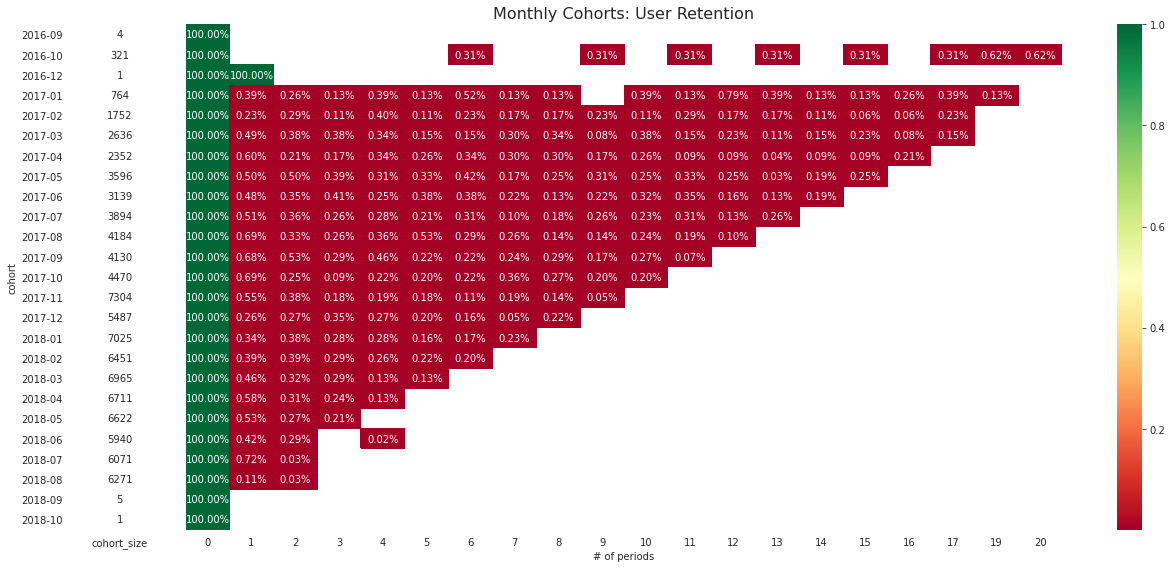

In [28]:
# plot the retention matrix
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.2%',      #числа округляем до сотых
                cmap='RdYlGn', #раскрашиваем ячейки
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [ ]:
# В период с января по декабрь с самым высоким retention на 3-й месяц является когорта 2017-06 с размером 3139 и с коэф. удержания 0,41%

In [ ]:
# 6. Построй RFM-кластеры для пользователей.
# Выведи для каждого кластера средние значения метрик R, F, M (и опиши подробно, как были построены метрики R, F, M).

In [ ]:
# RFM-анализ делит пользователей на сегменты в зависимости от давности (Recency), частоты (Frequency)
# и общей суммы платежей (Monetary).
# Recency — разница между текущей датой и датой последнего платежа (как давно ваши клиенты что-то покупали)
# Frequency — количество транзакций (как часто клиенты покупают)
# Monetary — сумма покупок
# Эти три показателя нужно рассчитать отдельно для каждого покупателя.
# После чего поставить оценки от 1-3 или 1-5. Чем шире диапазон, тем более узкие сегменты у нас получатся.
# Баллы можно выставить с использованием квантилей. Сортируем данные по одному из критериев и делим на равныегруппы.

# Будем использовать дату order_purchase_timestamp (время создания заказа)
# Для создания recency, frequency и monetary мы сгруппируем наши записи по customer_unique_id

In [81]:
customers_orders_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,Tuesday,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,Friday,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,Saturday,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,Tuesday,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,Sunday,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [58]:
price=customers_orders_items.groupby('order_id', as_index=False).agg({'price':'sum'}) #смотрим сумму каждого чека

In [59]:
all_orders=customers_orders_items[['order_id','customer_unique_id','order_purchase_timestamp']].drop_duplicates() #отобрали нужные колонки для нашего анализа

In [60]:
df=all_orders.merge(price, how='left', on=['order_id']) 

In [61]:
# Данные у нас староваты, поэтому мы возьмем следующий день после максимального
# сгруппируем по customer_unique_id, посчитаем разницу между текущей датой и датой последнего заказа,
# посчитаем количество транзакций и сумму покупок.

last_date = df['order_purchase_timestamp'].max() + timedelta(days=1)
rfmTable = df.groupby('customer_unique_id')\
            .agg({'order_purchase_timestamp': lambda x: (last_date - x.max()).days,
                                                 'order_id': lambda x: len(x), 
                                                 'price': lambda x: x.sum()})
rfmTable.rename(columns={'order_purchase_timestamp': 'recency', 
                          'order_id': 'frequency', 
                          'price': 'monetary_value'}, inplace=True)

In [72]:
# Теперь нам нужно выставить оценки. Мы будем разбивать на диапазон от 1 до 5.
# Чем шире диапазон, тем более точные наши группы, но в тоже время работать с большим количеством комбинаций сложнее.

quantiles = rfmTable.quantile(q=[0.20, 0.40, 0.60, 0.80]) #разбиваем с помощью quantile() на равные 5 сегментов
quantiles = quantiles.to_dict() #метод конвертирует датафрейм в словарь, устанавливает имена столбцов в качестве ключей словаря 
segmented_rfm = rfmTable

# Пишем функцию по которой будет присвоена сооответствующая оценка для frequency, monetary_value 

def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 1
     elif x <= d[p][0.40]:
         return 2
     elif x <= d[p][0.60]: 
         return 3
     elif x<=d[p][0.80]:
         return 4
     else:
         return 5

# Пишем функцию по которой будет присвоена сооответствующая оценка для recency

def RScore_2(x,p,d):
     if x <= d[p][0.20]:
         return 5
     elif x <= d[p][0.40]:
         return 4
     elif x <= d[p][0.60]: 
         return 3
     elif x<=d[p][0.80]:
         return 2
     else:
         return 1

# Применяем функцию к каждому из параметров (столбцу) и создаем столбец с RFMScore, где одним числом записаны наши оценки

segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore_2, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(RScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(RScore, args=('monetary_value',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
print(segmented_rfm.head())

                                  recency  frequency  monetary_value  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2      161          1          129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f      164          1           18.90   
0000f46a3911fa3c0805444483337064      586          1           69.00   
0000f6ccb0745a6a4b88665a16c9f078      370          1           25.99   
0004aac84e0df4da2b147fca70cf8255      337          1          180.00   

                                  r_quartile  f_quartile  m_quartile RFMScore  
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2           4           1           4      414  
0000b849f77a49e4a4ce2b2a4ca5be3f           4           1           1      411  
0000f46a3911fa3c0805444483337064           1           1           2      112  
0000f6ccb0745a6a4b88665a16c9f078           2           1           1      211  
0004aac84e0df4d

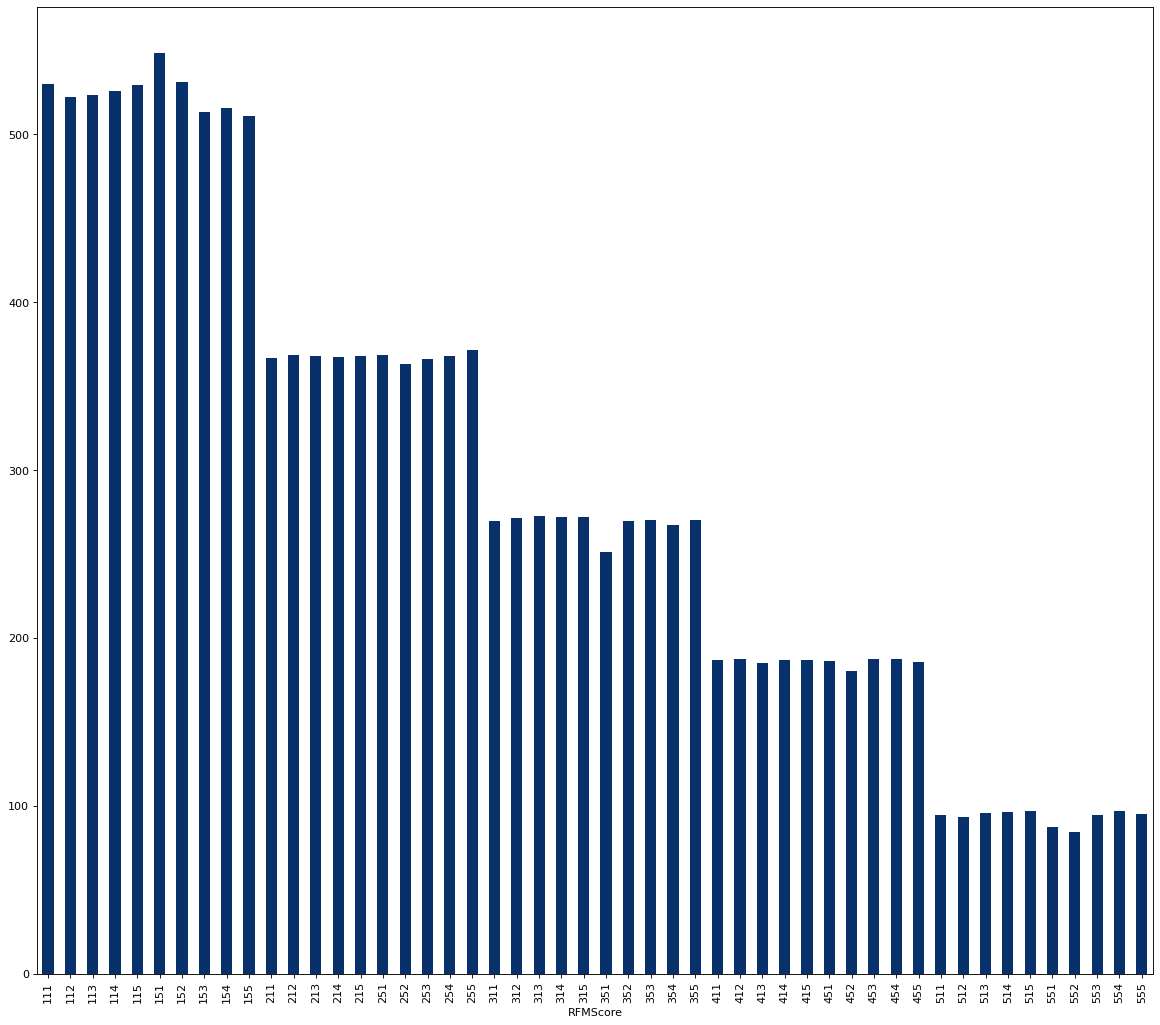

In [73]:
# Можем посмотреть среднее значение давности recency по всем RFMScore

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('recency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

In [ ]:
# С помощью RFM анализа сформировали сегменты и в зависимости от сегмента в дальнейшем мы можем воздействовать
# на них, например: предложить бонус, льготу, отправить push или email уведомление.

# Эффект от использования RFM анализа может быть следующим: удержание клиентов, повышение дохода, повышение лояльность клиентов.

# Примеры интерпретации сегментов RFM анализа:
# R=5, F=5, M=5 — платят чаcто, много и недавно. Самые лояльным и активные пользователи.
# R=1, F=1, M=1 — платят мало, редко и давно. Скорее всего потерянные клиенты. Возможно не стоит предпринять действия по их возврату, если цена привлечения выше ожидаемой прибыли.
# R=1/2, F=4/5, M=4/5 — лояльные пользователи на грани ухода. Предлагаем им бонус, скидку и пытаемся их вернуть.
# R=4/5, F=1, M=1/2/3/4/5 — пользователи недавно совершили платеж. Пробуем их стимулировать покупать еще.